In [11]:
#IMPORTS HERE:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as display

In [12]:
pd.set_option('display.max_columns', None)

column_names = ["Week", "Team", "Day", "Date", "Time", "Link", "Result", "OT",  
        "Rec", "H/A", "Opp", "Score_Tm", "Score_Opp", 
        "Off_1stD", "Off_TotYd", "Off_PassY", "Off_RushY", "Off_TO", 
        "Def_1stD", "Def_TotYd", "Def_PassY", "Def_RushY", "Def_TO", 
        "Exp_Offense", "Exp_Defense", "Exp_SpecTms"]

data2 = pd.read_csv('2022data.csv', skiprows=3, names=column_names)

data2 = data2[data2['Result'].isin(['W', 'L', 'T'])]

data2.drop(columns=['Link', 'Opp'], inplace=True)

data2['OT'] = data2['OT'].apply(lambda x: 'Yes' if x == 'OT' else 'No')
data2['H/A'] = data2['H/A'].apply(lambda x: 'Away' if x == '@' else 'Home')

cols_to_fill = [col for col in data2.columns if col.startswith(('Score', 'Off', 'Def', 'Exp'))]
data2[cols_to_fill] = data2[cols_to_fill].fillna(0)

data2['Week'] = pd.to_numeric(data2['Week'], errors='coerce')
data2 = data2.dropna(subset=['Week'])

rec_split = data2['Rec'].str.split('-', expand=True)
if len(rec_split.columns) == 2:
    rec_split[2] = '0'
rec_split.columns = ['Win', 'Loss', 'Tie']
data2[['Win', 'Loss', 'Tie']] = rec_split

# Replace non-numeric values in 'Win', 'Loss', and 'Tie' columns with 0
data2[['Win', 'Loss', 'Tie']] = data2[['Win', 'Loss', 'Tie']].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

data2 = data2.drop(columns=['Rec'])

In [13]:
data2

,Week,Team,Day,Date,Time,Result,OT,H/A,Score_Tm,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
0,3.0,49ers,Sun,25-Sep,8:20PM ET,L,No,Away,10,11.0,13.0,267.0,179.0,88.0,3.0,14.0,261.0,160.0,101.0,0.0,-16.39,13.59,-1.26,2,0,0
1,4.0,49ers,Mon,3-Oct,8:15PM ET,W,No,Home,24,9.0,13.0,327.0,239.0,88.0,0.0,21.0,257.0,200.0,57.0,2.0,10.05,11.56,-7.93,2,0,0
2,5.0,49ers,Sun,9-Oct,4:05PM ET,W,No,Away,37,15.0,22.0,397.0,244.0,153.0,1.0,15.0,308.0,244.0,64.0,1.0,16.04,13.22,-7.82,2,0,0
3,6.0,49ers,Sun,16-Oct,1:00PM ET,L,No,Away,14,28.0,21.0,346.0,296.0,50.0,3.0,18.0,289.0,121.0,168.0,0.0,0.59,-11.56,1.69,3,0,0
4,7.0,49ers,Sun,23-Oct,4:25PM ET,L,No,Home,23,44.0,25.0,444.0,343.0,101.0,3.0,24.0,529.0,417.0,112.0,2.0,3.59,-30.58,8.50,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,14.0,vikings,Sun,11-Dec,1:00PM ET,L,No,Away,23,34.0,23.0,416.0,394.0,22.0,2.0,23.0,464.0,330.0,134.0,0.0,7.96,-19.88,0.55,3,0,0
608,15.0,vikings,Sat,17-Dec,1:00PM ET,W,Yes,Home,39,36.0,32.0,518.0,426.0,92.0,3.0,20.0,341.0,170.0,171.0,1.0,4.19,10.70,-12.83,3,0,0
609,16.0,vikings,Sat,24-Dec,1:00PM ET,W,No,Home,27,24.0,23.0,353.0,270.0,83.0,0.0,23.0,445.0,319.0,126.0,2.0,7.38,-6.20,3.12,3,0,0
610,17.0,vikings,Sun,1-Jan,4:25PM ET,L,No,Away,17,41.0,18.0,346.0,244.0,102.0,4.0,20.0,315.0,152.0,163.0,0.0,-10.20,-9.54,-4.19,4,0,0


In [14]:
corr2 = data2.corr()
corr2

,Week,Score_Opp,Off_1stD,Off_TotYd,Off_PassY,Off_RushY,Off_TO,Def_1stD,Def_TotYd,Def_PassY,Def_RushY,Def_TO,Exp_Offense,Exp_Defense,Exp_SpecTms,Win,Loss,Tie
Week,1.000000,-0.005286,-0.070511,-0.057791,-0.092141,0.042915,0.031595,-0.077893,-0.068275,-0.094425,0.031441,0.035964,-0.074451,0.077227,-0.003971,0.695503,-0.034460,-0.146948
Score_Opp,-0.005286,1.000000,0.091012,0.105883,0.175050,-0.087072,0.337260,0.592268,0.633688,0.377828,0.382727,-0.208390,-0.044954,-0.791515,0.111041,0.022791,0.032927,0.010476
Off_1stD,-0.070511,0.091012,1.000000,0.799989,0.564839,0.368795,-0.004920,-0.081070,-0.056525,0.014609,-0.099502,0.028030,0.696011,-0.079992,-0.344102,-0.121554,0.006702,-0.029872
Off_TotYd,-0.057791,0.105883,0.799989,1.000000,0.740710,0.414050,0.026259,-0.057045,-0.032880,0.038906,-0.099020,0.017647,0.716029,-0.044384,-0.414638,-0.085526,-0.005983,-0.022060
Off_PassY,-0.092141,0.175050,0.564839,0.740710,1.000000,-0.304841,0.142044,0.012523,0.034804,0.024178,0.016385,-0.076723,0.444703,-0.100036,-0.326610,-0.107485,0.034669,0.004694
Off_RushY,0.042915,-0.087072,0.368795,0.414050,-0.304841,1.000000,-0.155229,-0.097836,-0.093768,0.022395,-0.162574,0.128968,0.412541,0.072617,-0.145283,0.024386,-0.055454,-0.037632
Off_TO,0.031595,0.337260,-0.004920,0.026259,0.142044,-0.155229,1.000000,0.029974,0.017504,-0.077045,0.128931,-0.095782,-0.363324,-0.071645,-0.086774,0.020285,0.080474,0.033445
Def_1stD,-0.077893,0.592268,-0.081070,-0.057045,0.012523,-0.097836,0.029974,1.000000,0.798888,0.562125,0.366422,-0.005151,0.078552,-0.696424,0.344387,-0.032350,-0.011672,0.055042
Def_TotYd,-0.068275,0.633688,-0.056525,-0.032880,0.034804,-0.093768,0.017504,0.798888,1.000000,0.738892,0.410961,0.028925,0.043403,-0.715691,0.413511,-0.023485,-0.017479,0.053663
Def_PassY,-0.094425,0.377828,0.014609,0.038906,0.024178,0.022395,-0.077045,0.562125,0.738892,1.000000,-0.310637,0.143044,0.099185,-0.443917,0.324550,-0.048906,-0.005368,0.024988


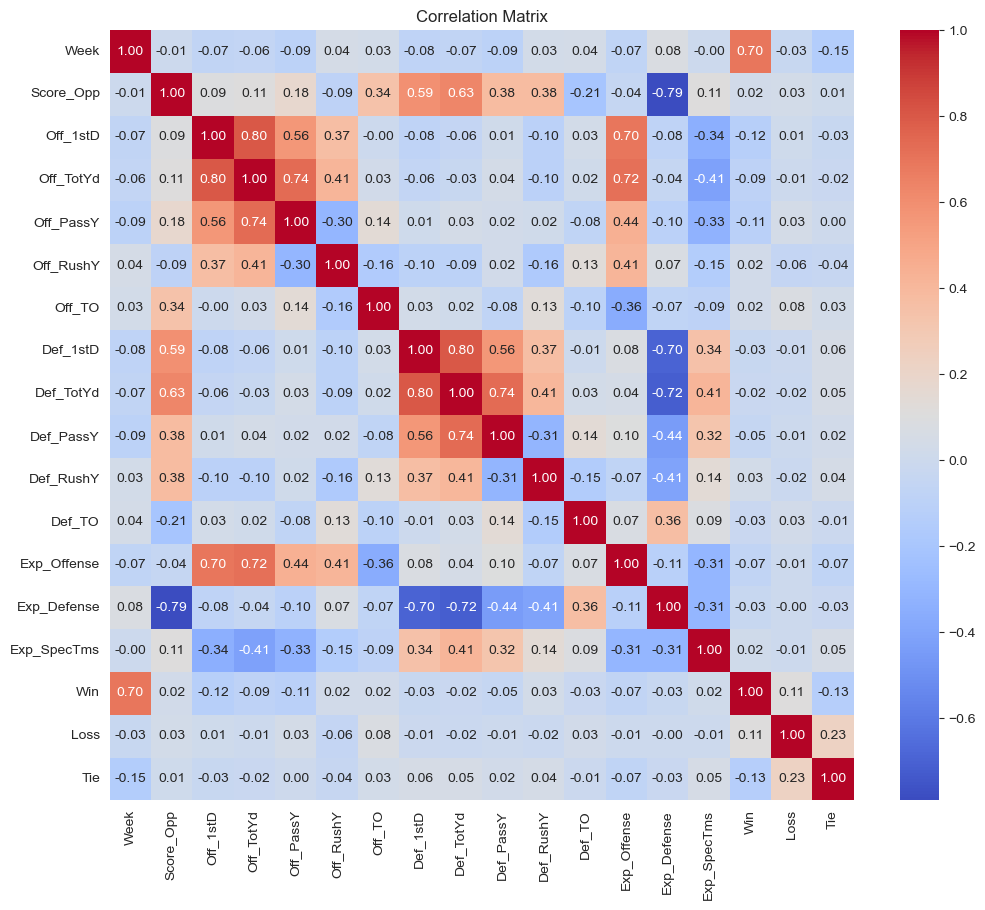

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Find and print the maximum correlation values that aren't 1
print("Maximum correlation values that aren't 1:")
for column in corr2.columns:
    max_corr = corr2[column][corr2[column] < 1].max()
    if not pd.isnull(max_corr):
        print(f"Max correlation for {column}: {max_corr:.2f}")

Maximum correlation values that aren't 1:
Max correlation for Week: 0.70
Max correlation for Score_Opp: 0.63
Max correlation for Off_1stD: 0.80
Max correlation for Off_TotYd: 0.80
Max correlation for Off_PassY: 0.74
Max correlation for Off_RushY: 0.41
Max correlation for Off_TO: 0.34
Max correlation for Def_1stD: 0.80
Max correlation for Def_TotYd: 0.80
Max correlation for Def_PassY: 0.74
Max correlation for Def_RushY: 0.41
Max correlation for Def_TO: 0.36
Max correlation for Exp_Offense: 0.72
Max correlation for Exp_Defense: 0.36
Max correlation for Exp_SpecTms: 0.41
Max correlation for Win: 0.70
Max correlation for Loss: 0.23
Max correlation for Tie: 0.23


In [17]:
# Find and print the maximum correlation values that aren't 1 along with the corresponding variables
print("Maximum correlation values that aren't 1:")
for column in corr2.columns:
    max_corr = corr2[column][corr2[column] < 1].max()
    if not pd.isnull(max_corr):
        correlated_variable = corr2[column][corr2[column] == max_corr].index[0]
        print(f"Max correlation for {column} with {correlated_variable}: {max_corr:.2f}")

Maximum correlation values that aren't 1:
Max correlation for Week with Win: 0.70
Max correlation for Score_Opp with Def_TotYd: 0.63
Max correlation for Off_1stD with Off_TotYd: 0.80
Max correlation for Off_TotYd with Off_1stD: 0.80
Max correlation for Off_PassY with Off_TotYd: 0.74
Max correlation for Off_RushY with Off_TotYd: 0.41
Max correlation for Off_TO with Score_Opp: 0.34
Max correlation for Def_1stD with Def_TotYd: 0.80
Max correlation for Def_TotYd with Def_1stD: 0.80
Max correlation for Def_PassY with Def_TotYd: 0.74
Max correlation for Def_RushY with Def_TotYd: 0.41
Max correlation for Def_TO with Exp_Defense: 0.36
Max correlation for Exp_Offense with Off_TotYd: 0.72
Max correlation for Exp_Defense with Def_TO: 0.36
Max correlation for Exp_SpecTms with Def_TotYd: 0.41
Max correlation for Win with Week: 0.70
Max correlation for Loss with Tie: 0.23
Max correlation for Tie with Loss: 0.23


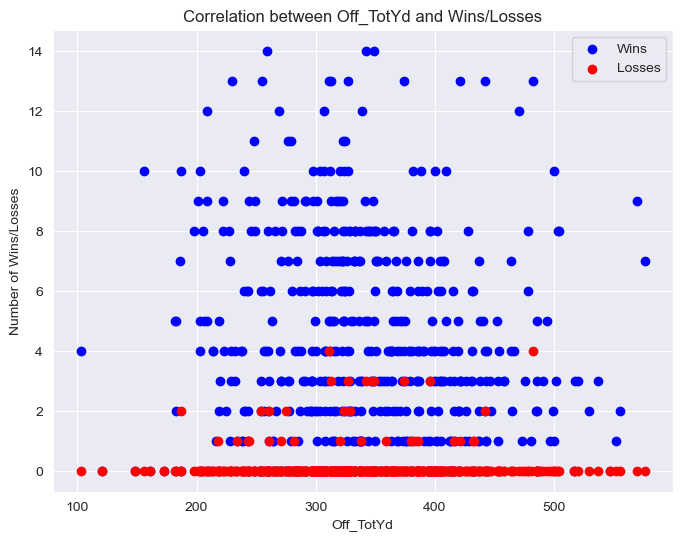

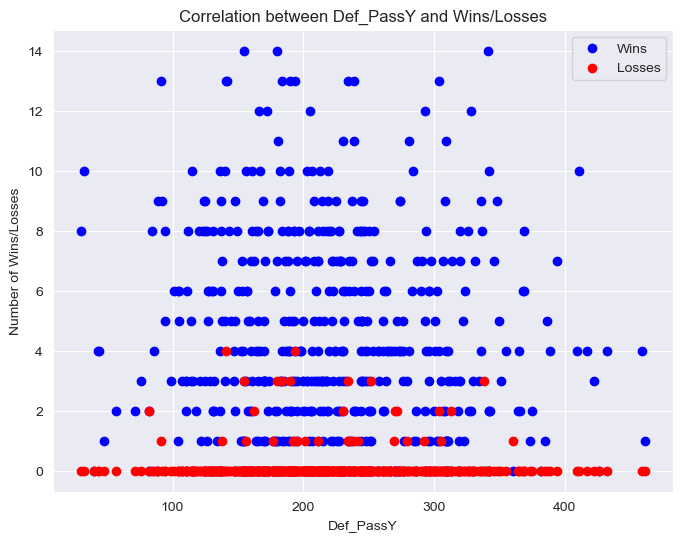

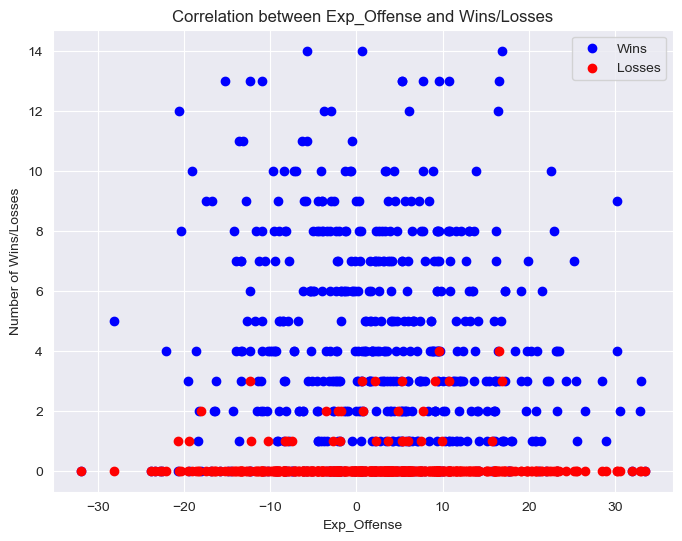

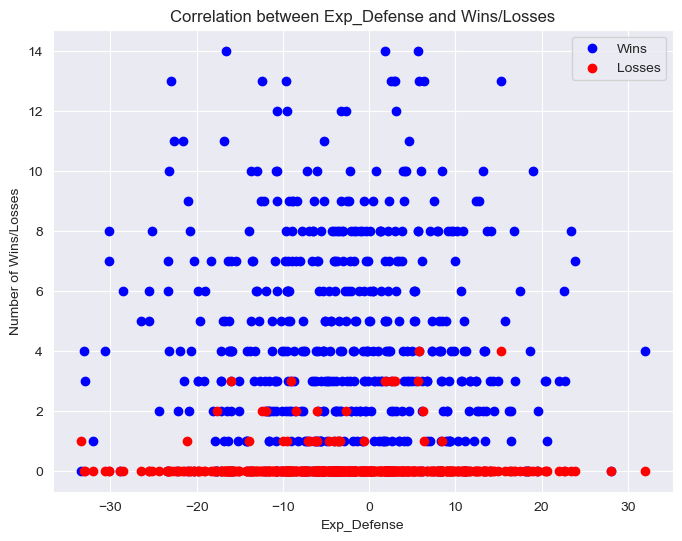

In [18]:
features = ['Off_TotYd', 'Def_PassY', 'Exp_Offense', 'Exp_Defense']

for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data2[feature], data2['Win'], color='blue', label='Wins')
    plt.scatter(data2[feature], data2['Loss'], color='red', label='Losses')
    plt.xlabel(feature)
    plt.ylabel('Number of Wins/Losses')
    plt.title(f'Correlation between {feature} and Wins/Losses')
    plt.legend()
    plt.show()